# Road Damage Dataset Tutorial
Welcome to the tutorial of Road Crack Dataset.
In this tutorial, we will show you:
- How to download Road Crack Dataset
- The structure of the Dataset
- The statistical information of the dataset
- How to evaluate your result

If you have something wrong, please contact :
`maedahi@iis.u-tokyo.ac.jp`

# Required library
In this tutorial, you need to set up tensorflow 1.4 (We recommend tensorflow-gpu 1.4).

It takes only 10 mins if you already prepared CUDA settings, please view [tensorflow website](https://www.tensorflow.org/install/). We recomend [Installing with virtualenv](https://www.tensorflow.org/install/install_linux).
- tensorflow 1.4

# The sturcture of Road Damage Dataset
Road Damage Dataset contains trained models and Annotated images.
Annotated images are presented as the same format to [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).
- trainedModels
    - SSD_inception
    - SSD_mobilenet
- RoadCrackDataset (dataset structure is the same format as PASCAL VOC)
    - Japan
        - images : contains images
        - Annotations : contains xml files of annotation
    - Czech
         - images : contains images
        - Annotations : contains xml files of annotation
    - India
         - images : contains images
        - Annotations : contains xml files of annotation

In [1]:
# "C:\Users\telomere\Desktop\FYP\Data\train\train\Japan"
# "C:\Users\telomere\Desktop\FYP\Data\train\train\Czech"
# "C:\Users\telomere\Desktop\FYP\Data\train\train\India"

# The Definition of Road Damage

<img src="images/RoadDamageTypeDef.png">

# OK! So let's get started!
# First, download dataset and

First you need to download and extract the dataset and code.

Make sure your disk have 2GB free space for the dataset at least.

In [5]:
import os
import six.moves.urllib as urllib

In [3]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./train.tar.gz'):
    url_base = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz'
    urllib.request.urlretrieve(url_base, './train.tar.gz')
    print("Download train.tar.gz Done")
else:
    print("You have train.tar.gz")

NameError: name 'os' is not defined

In [ ]:
if not os.path.exists('./trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, './trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

In [ ]:
# this procces may take a few minutes
!tar -zxf ./RoadDamageDataset.tar.gz
!tar -zxf ./trainedModels.tar.gz

# The statistical information of the dataset

In [7]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [14]:
base_path = os.getcwd() + '/RoadDamageDataset/'


damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
folder = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]
govs =["Czech","India","Japan"]

In [12]:
train_folder = r"C:\Users\telomere\Desktop\FYP\Data\train\train"

In [21]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(os.path.join(train_folder, gov ,"annotations","xmls")) if not filename.startswith('.')]
    print(file_list)
    for file in file_list:
        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(os.path.join(train_folder, gov ,"annotations","xmls",file))
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

['Czech_000000.xml', 'Czech_000001.xml', 'Czech_000002.xml', 'Czech_000006.xml', 'Czech_000007.xml', 'Czech_000009.xml', 'Czech_000010.xml', 'Czech_000011.xml', 'Czech_000012.xml', 'Czech_000013.xml', 'Czech_000014.xml', 'Czech_000015.xml', 'Czech_000017.xml', 'Czech_000018.xml', 'Czech_000020.xml', 'Czech_000021.xml', 'Czech_000022.xml', 'Czech_000024.xml', 'Czech_000025.xml', 'Czech_000027.xml', 'Czech_000028.xml', 'Czech_000030.xml', 'Czech_000031.xml', 'Czech_000032.xml', 'Czech_000033.xml', 'Czech_000034.xml', 'Czech_000037.xml', 'Czech_000038.xml', 'Czech_000039.xml', 'Czech_000040.xml', 'Czech_000041.xml', 'Czech_000043.xml', 'Czech_000044.xml', 'Czech_000045.xml', 'Czech_000047.xml', 'Czech_000048.xml', 'Czech_000050.xml', 'Czech_000054.xml', 'Czech_000055.xml', 'Czech_000056.xml', 'Czech_000057.xml', 'Czech_000058.xml', 'Czech_000060.xml', 'Czech_000061.xml', 'Czech_000062.xml', 'Czech_000063.xml', 'Czech_000064.xml', 'Czech_000065.xml', 'Czech_000066.xml', 'Czech_000067.xml',

['India_000000.xml', 'India_000001.xml', 'India_000002.xml', 'India_000003.xml', 'India_000005.xml', 'India_000007.xml', 'India_000010.xml', 'India_000011.xml', 'India_000012.xml', 'India_000014.xml', 'India_000016.xml', 'India_000017.xml', 'India_000018.xml', 'India_000019.xml', 'India_000022.xml', 'India_000023.xml', 'India_000024.xml', 'India_000026.xml', 'India_000027.xml', 'India_000028.xml', 'India_000032.xml', 'India_000035.xml', 'India_000036.xml', 'India_000037.xml', 'India_000038.xml', 'India_000039.xml', 'India_000040.xml', 'India_000041.xml', 'India_000042.xml', 'India_000043.xml', 'India_000046.xml', 'India_000047.xml', 'India_000049.xml', 'India_000052.xml', 'India_000053.xml', 'India_000054.xml', 'India_000055.xml', 'India_000057.xml', 'India_000059.xml', 'India_000061.xml', 'India_000064.xml', 'India_000066.xml', 'India_000067.xml', 'India_000069.xml', 'India_000071.xml', 'India_000072.xml', 'India_000073.xml', 'India_000074.xml', 'India_000075.xml', 'India_000076.xml',

['Japan_000000.xml', 'Japan_000001.xml', 'Japan_000002.xml', 'Japan_000003.xml', 'Japan_000004.xml', 'Japan_000005.xml', 'Japan_000006.xml', 'Japan_000008.xml', 'Japan_000009.xml', 'Japan_000010.xml', 'Japan_000011.xml', 'Japan_000012.xml', 'Japan_000013.xml', 'Japan_000014.xml', 'Japan_000015.xml', 'Japan_000017.xml', 'Japan_000018.xml', 'Japan_000019.xml', 'Japan_000020.xml', 'Japan_000022.xml', 'Japan_000023.xml', 'Japan_000024.xml', 'Japan_000025.xml', 'Japan_000026.xml', 'Japan_000027.xml', 'Japan_000028.xml', 'Japan_000029.xml', 'Japan_000030.xml', 'Japan_000031.xml', 'Japan_000032.xml', 'Japan_000033.xml', 'Japan_000034.xml', 'Japan_000035.xml', 'Japan_000036.xml', 'Japan_000037.xml', 'Japan_000038.xml', 'Japan_000040.xml', 'Japan_000041.xml', 'Japan_000042.xml', 'Japan_000043.xml', 'Japan_000044.xml', 'Japan_000045.xml', 'Japan_000046.xml', 'Japan_000049.xml', 'Japan_000050.xml', 'Japan_000051.xml', 'Japan_000053.xml', 'Japan_000056.xml', 'Japan_000058.xml', 'Japan_000059.xml',

total
# of images：21041
# of labels：34702


D00 : 6592
D01 : 179
D10 : 4446
D11 : 45
D20 : 8381
D40 : 5627
D43 : 793
D44 : 5057


C:\Users\telomere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


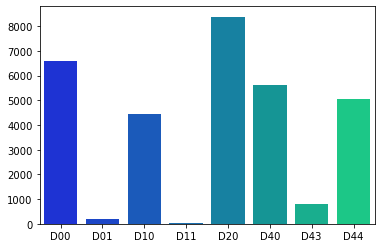

In [22]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [23]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(os.path.join(train_folder, gov ,"annotations","xmls")) if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(os.path.join(train_folder, gov ,"annotations","xmls",file))
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Czech
# of images：2829
# of labels：1745
D00 : 988
D01 : 0
D10 : 399
D11 : 0
D20 : 161
D40 : 197
D43 : 0
D44 : 0
**************************************************
India
# of images：7706
# of labels：8203
D00 : 1555
D01 : 179
D10 : 68
D11 : 45
D20 : 2021
D40 : 3187
D43 : 57
D44 : 1062
**************************************************
Japan
# of images：10506
# of labels：24754
D00 : 4049
D01 : 0
D10 : 3979
D11 : 0
D20 : 6199
D40 : 2243
D43 : 736
D44 : 3995
**************************************************


# Check some images in this dataset

In [24]:
import cv2
import random

In [37]:
def draw_images(image_file,xml_path):
#     gov = image_file.split('_')[0]
    img = cv2.imread(image_file)
    
    infile_xml = open(xml_path)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

In [81]:
number =1
for gov in govs:
    imgFolder =imgFolder =os.path.join(train_folder, gov ,"images")
    imgs=os.listdir(imgFolder)
    for img in imgs[0:10]:
        imgPath = os.path.join(imgFolder,img)
        xmlPath =os.path.join(train_folder, gov ,"annotations","xmls",img[:-4]+".xml")
        print(imgPath,xmlPath)
        image=draw_images(imgPath,xmlPath)
        plt.subplot(1,1,number)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\telomere\\Desktop\\FYP\\Data\\custom_label_dataset\\Czech\\images'

In [56]:
custom_train_folder = r"C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset"

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0496.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0496.xml


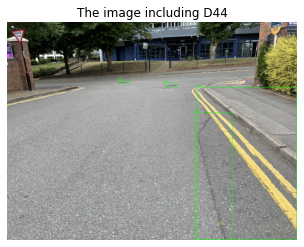

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0497.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0497.xml


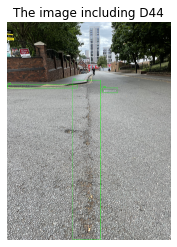

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0498.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0498.xml


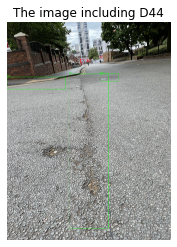

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0499.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0499.xml


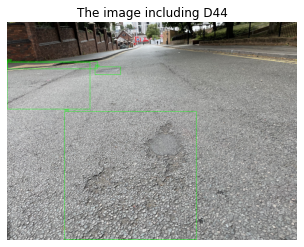

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0500.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0500.xml


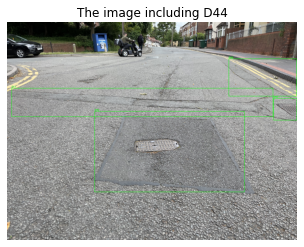

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0501.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0501.xml


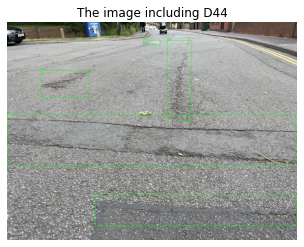

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0502.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0502.xml


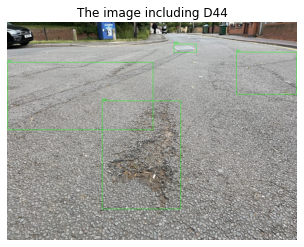

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0503.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0503.xml


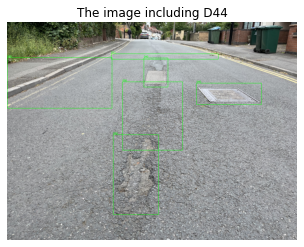

C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\images\IMG_0504.JPG C:\Users\telomere\Desktop\FYP\Data\custom_label_dataset\annotations\img_0504.xml


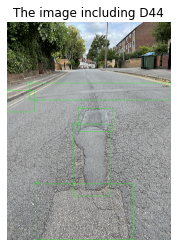

In [63]:
number =1
imgFolder =imgFolder =os.path.join(custom_train_folder,"images")
imgs=os.listdir(imgFolder)
for img in imgs[1:10]:
    imgPath = os.path.join(imgFolder,img)
    xmlPath =os.path.join(train_folder,"annotations",str.lower(img[:-4])+".xml")
    print(imgPath,xmlPath)
    image=draw_images(imgPath,xmlPath)
    plt.subplot(1,1,number)
    plt.axis('off')
    plt.title('The image including ' + damageType)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Next, try road damage detection using SSD_mobilenet!

# Imports

In [64]:
import numpy as np
import sys
import tarfile
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow as tf

import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# if tf.__version__ != '1.4.1':
#   raise ImportError('Please upgrade your tensorflow installation to v1.4.1!')
from utils import label_map_util

from utils import visualization_utils as vis_util
from detection_utils import parse_output_dict

## Object detection imports
Here are the imports from the object detection module.

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [51]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT =  r"C:\Users\telomere\Desktop\FYP\trainedModels\trainedModels\ssd_mobilenet_innference_graph.pb" 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = r"C:\Users\telomere\Desktop\FYP\RoadDamageDetector\crackLabelMap.txt"

NUM_CLASSES = 8

## Load a (frozen) Tensorflow model into memory.

In [52]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [49]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [50]:
NUM_CLASSES

8

## Helper code

In [66]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [79]:
import cv2
from xml_utils import create_root, create_objects_annotation_from_list, write_to_file
from format_xml_file import format_tree

def modify(output_dict):
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections] 
                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    return output_dict

In [40]:
IMAGE_SIZE = (12, 8)

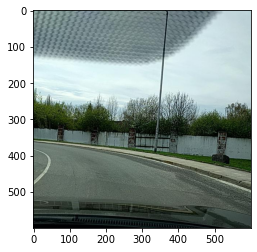

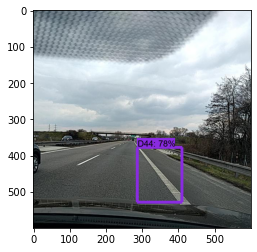

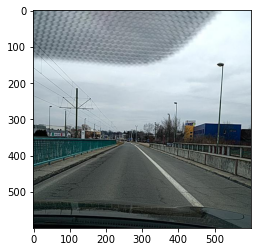

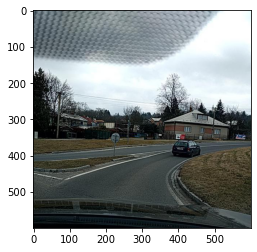

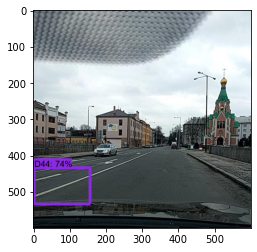

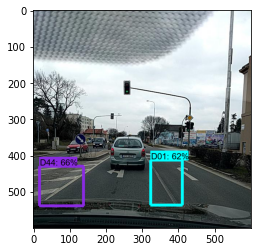

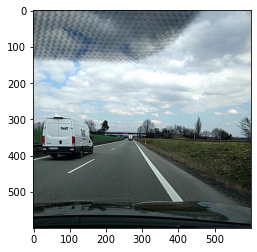

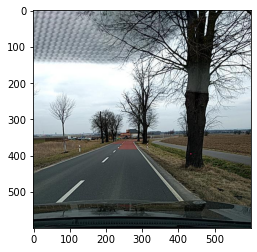

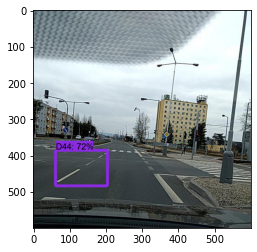

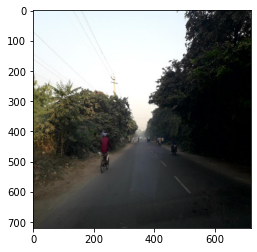

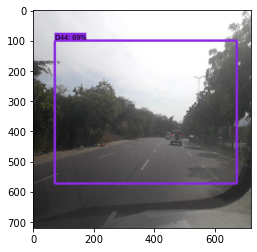

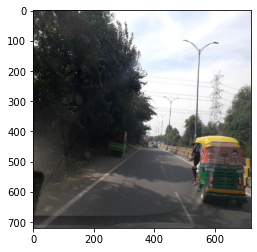

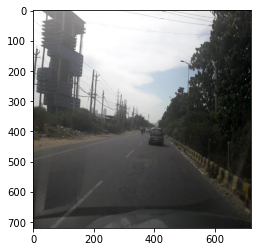

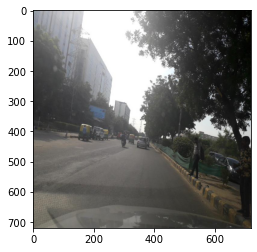

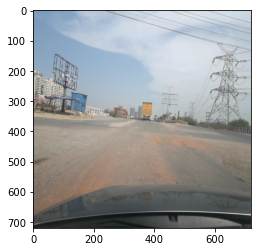

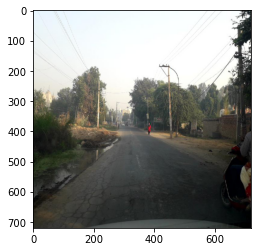

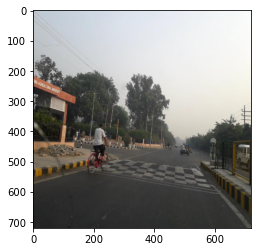

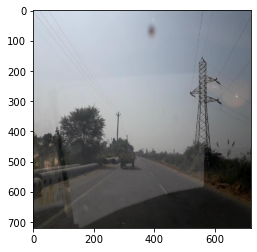

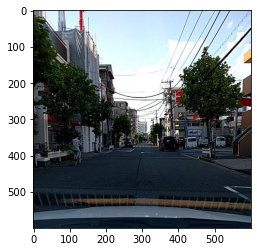

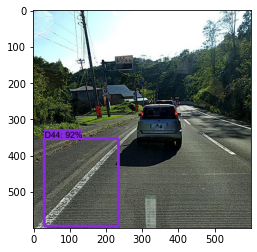

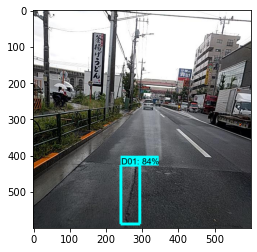

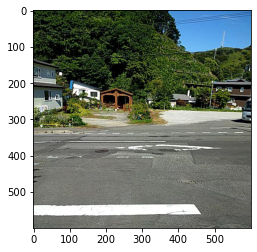

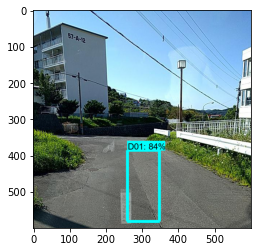

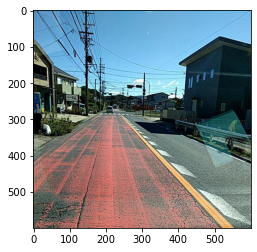

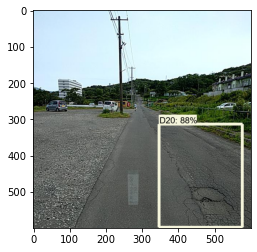

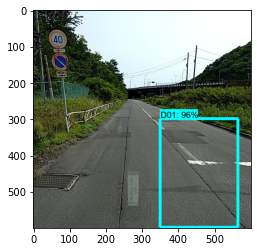

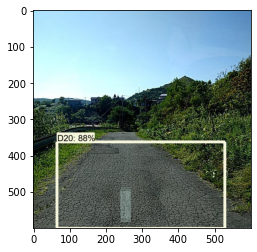

In [80]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        PATH_TO_TEST_IMAGES_DIR = r'C:\Users\telomere\Desktop\FYP\Data\test2\test2'
        for gov in govs:
            imgFolder =os.path.join(PATH_TO_TEST_IMAGES_DIR, gov ,"images")
            imgs=os.listdir(imgFolder)
            for img in imgs[1:10]:
                imgPath = os.path.join(imgFolder,img)
                image = Image.open(imgPath)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)
                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})
                output_dict= {}
                output_dict["detection_boxes"] =boxes
                output_dict['detection_classes'] = classes
                output_dict['detection_scores'] = scores
                output_dict['num_detections'] = num
                output_dict=modify(output_dict)
                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                  image_np,
                    output_dict['detection_boxes'],output_dict['detection_classes'],output_dict['detection_scores'],
                  category_index,
                  min_score_thresh=0.5,
                  use_normalized_coordinates=True,
                  line_thickness=8)
                plt.imshow(image_np)
                plt.show()